# About Dataset ~ Wine Quality Prediction


## Context

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available at https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

### Content


Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)







# **Import Necessary Libraries**



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Read the data**

In [18]:
data = pd.read_csv("winequality-red.csv")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **Get the number of rows and columns**

In [19]:
data.shape

(1599, 12)

## **Statistical Analysis of the dataset**

In [20]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## **Know the data types in the dataset**

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Check for Null values**

In [22]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## **Perform bivariate analysis**

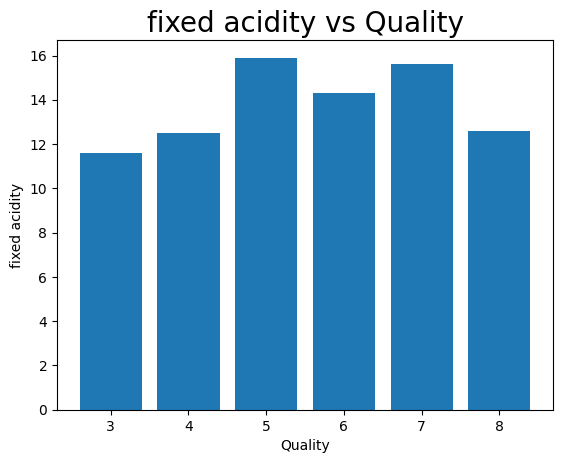

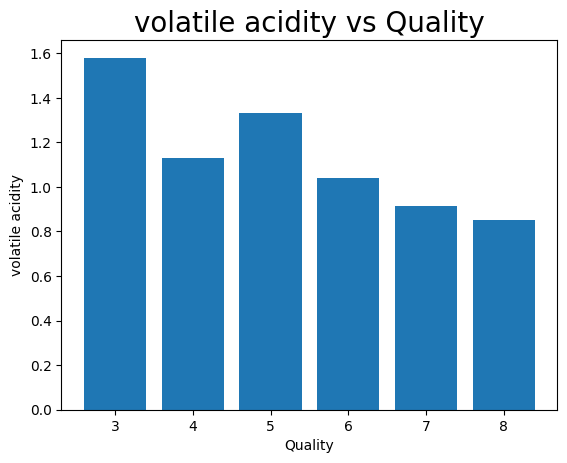

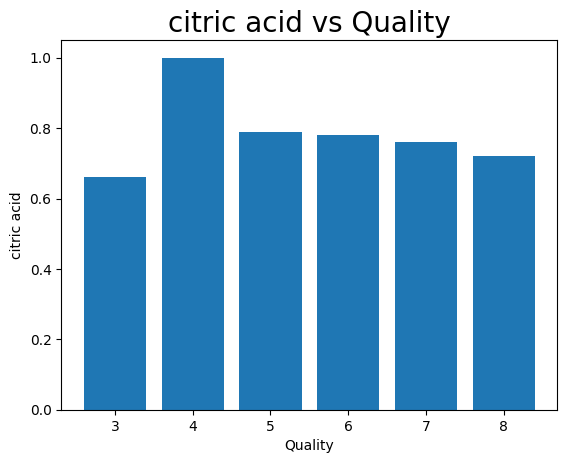

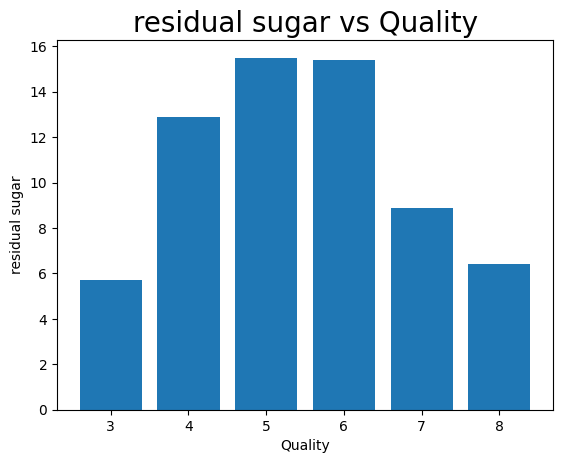

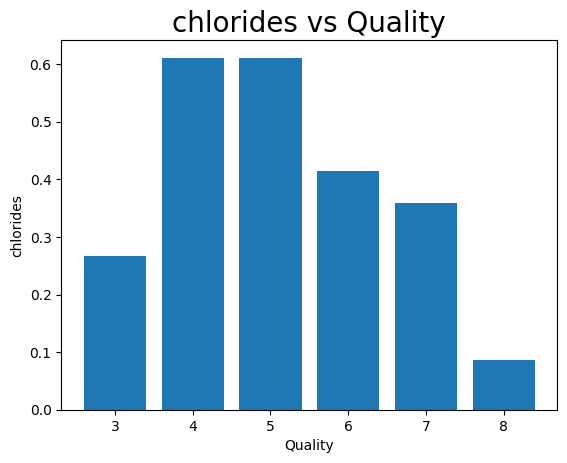

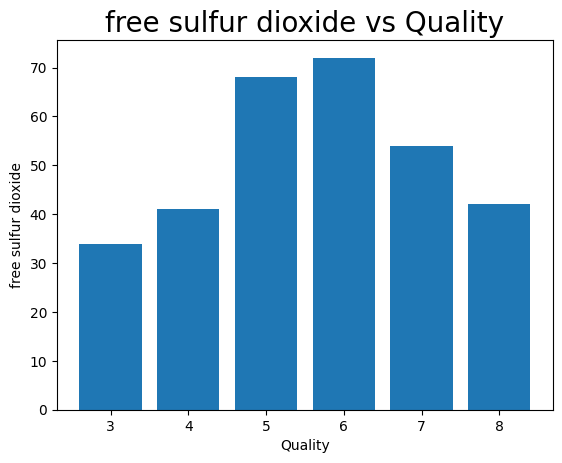

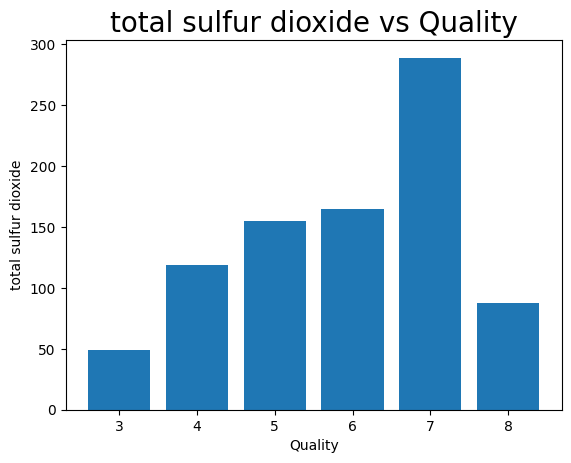

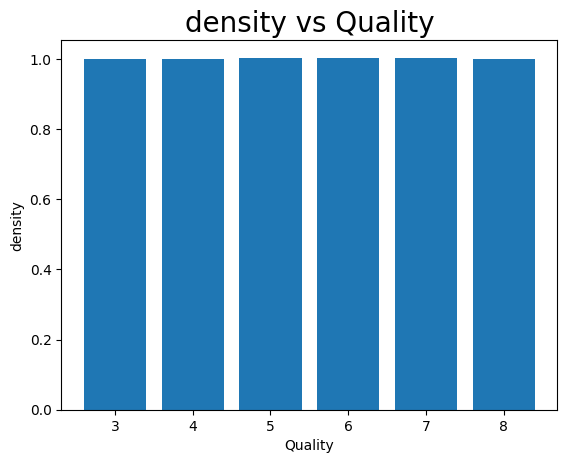

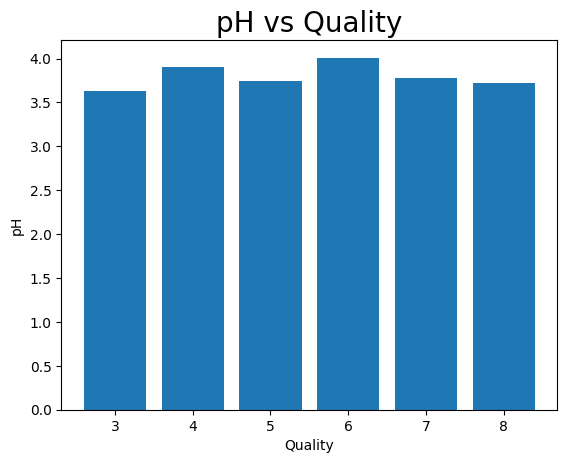

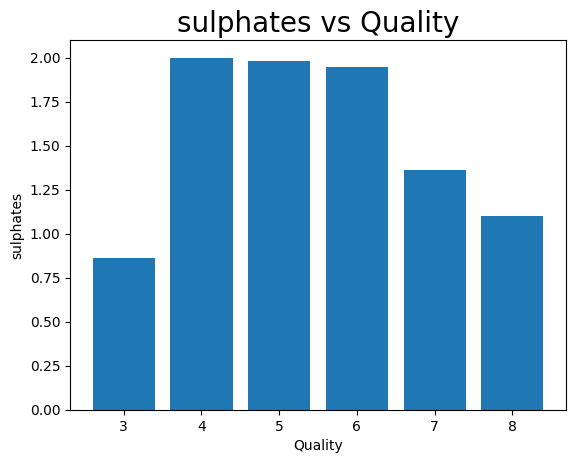

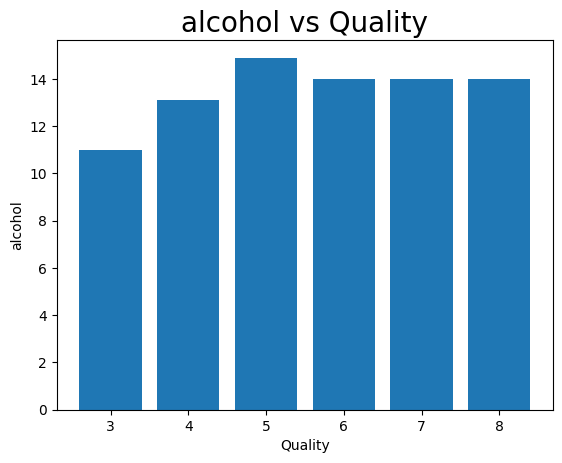

In [23]:
for column in data.columns:
  if column != "quality":
    plt.subplot()
    plt.bar( data["quality"], data[column])
    plt.title(column + " vs Quality", fontsize=20)
    plt.xlabel("Quality")
    plt.ylabel(column)
    plt.show()


## **Test for Correlation Matrix**

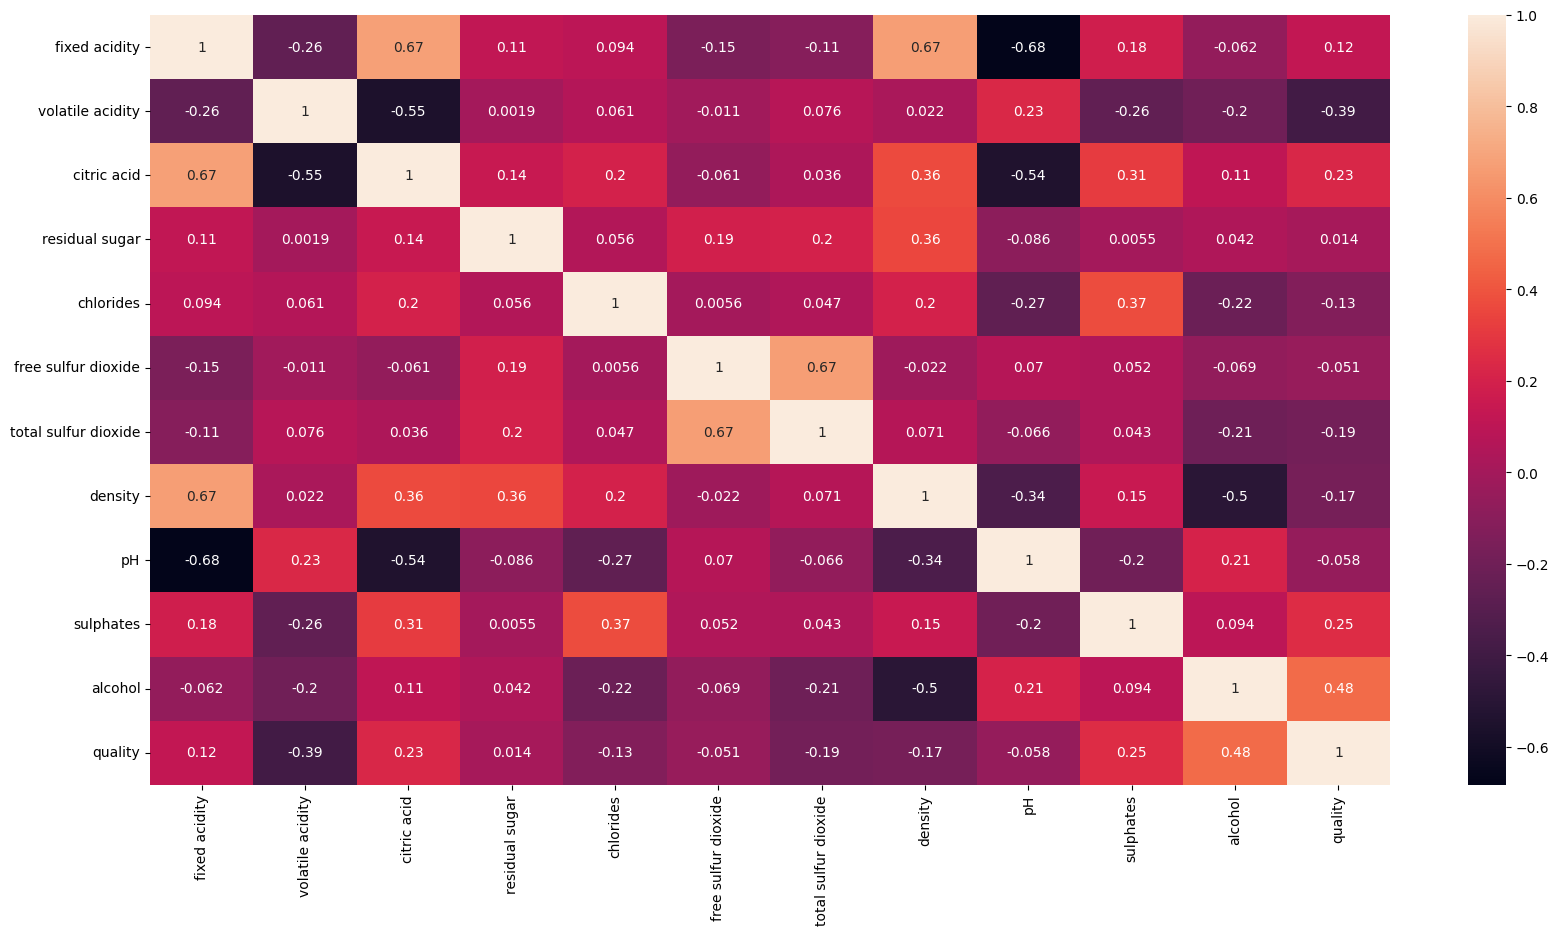

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## **Binarization of Outcome Variable**

In [25]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [26]:
data["quality"] = [1 if x>=7 else 0 for x in data["quality"]]

In [27]:
data["quality"].unique()

array([0, 1])

## **Store feature matrix in X and response(target) in vector y**

In [28]:
X = data.drop("quality", axis=1)
y = data["quality"]

## **Handling Imbalanced Dataset**

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_bal, y_bal = smote.fit_resample(X, y)

y_bal.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

## **Splitting the data into training and testing set**

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)


## **Feature Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Feature Dimensionality reduction using PCA**

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.9)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [33]:
sum(pca.explained_variance_ratio_)

0.9177542341443133

In [34]:
pca.explained_variance_ratio_

array([0.29549069, 0.18150629, 0.14522543, 0.10464729, 0.08413932,
       0.0595585 , 0.04718672])

## **Testing Models**

## **Logistic Regression Model**


In [35]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

In [36]:
log.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred1 = log.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# true values and predicted values
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print("Precision Score: ", precision_score(y_test, y_pred1))
print("Recall Score: ", recall_score(y_test, y_pred1))
print("F1 Score:", f1_score(y_test, y_pred1))

Accuracy Score:  0.8173598553345389
Precision Score:  0.7728813559322034
Recall Score:  0.8702290076335878
F1 Score: 0.8186714542190305


## **Support Vector Machine Model**

In [39]:
from sklearn import svm

svm = svm.SVC()

svm.fit(X_train, y_train)

y_pred2 = svm.predict(X_test)

In [40]:
# true values and predicted values
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print("Precision Score: ", precision_score(y_test, y_pred2))
print("Recall Score: ", recall_score(y_test, y_pred2))
print("F1 Score:", f1_score(y_test, y_pred2))

Accuracy Score:  0.8788426763110307
Precision Score:  0.8282828282828283
Recall Score:  0.9389312977099237
F1 Score: 0.8801431127012522


## **K Neighbours Classifier Model**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred3 = knn.predict(X_test)

In [43]:
# true values and predicted values
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print("Precision Score: ", precision_score(y_test, y_pred3))
print("Recall Score: ", recall_score(y_test, y_pred3))
print("F1 Score:", f1_score(y_test, y_pred3))

Accuracy Score:  0.8770343580470162
Precision Score:  0.8069620253164557
Recall Score:  0.9732824427480916
F1 Score: 0.8823529411764707


## **Decision Tree Classifier Model**

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred4 = dtc.predict(X_test)



In [45]:
# true values and predicted values
print("Accuracy Score: ", accuracy_score(y_test, y_pred4))
print("Precision Score: ", precision_score(y_test, y_pred4))
print("Recall Score: ", recall_score(y_test, y_pred4))
print("F1 Score:", f1_score(y_test, y_pred4))

Accuracy Score:  0.8481012658227848
Precision Score:  0.8111888111888111
Recall Score:  0.8854961832061069
F1 Score: 0.8467153284671532


## **Random Forest Classifier Model**

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred5 = rfc.predict(X_test)


In [47]:
# true values and predicted values
print("Accuracy Score: ", accuracy_score(y_test, y_pred5))
print("Precision Score: ", precision_score(y_test, y_pred5))
print("Recall Score: ", recall_score(y_test, y_pred5))
print("F1 Score:", f1_score(y_test, y_pred5))

Accuracy Score:  0.9132007233273056
Precision Score:  0.8767605633802817
Recall Score:  0.950381679389313
F1 Score: 0.9120879120879121


## **Gradient Boosting Classifier**

In [48]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred6 = gbc.predict(X_test)


In [49]:
# true values and predicted values
print("Accuracy Score: ", accuracy_score(y_test, y_pred6))
print("Precision Score: ", precision_score(y_test, y_pred6))
print("Recall Score: ", recall_score(y_test, y_pred6))
print("F1 Score:", f1_score(y_test, y_pred6))

Accuracy Score:  0.8734177215189873
Precision Score:  0.8428571428571429
Recall Score:  0.9007633587786259
F1 Score: 0.8708487084870847


## **Picking and Visualizing the Best Model**

In [50]:
final_df = pd.DataFrame({
   "Models": ["Logistic Regression", "Support Vector Machine", "KNeighboursClassifiers", "DecisionTreeClassifier", "RandomForestClassifier", "GradientBoostingClassifier"],
   "Accuracy": [accuracy_score(y_test, y_pred1)*100,
                accuracy_score(y_test, y_pred2)*100,
                accuracy_score(y_test, y_pred3)*100,
                accuracy_score(y_test, y_pred4)*100,
                accuracy_score(y_test, y_pred5)*100,
                accuracy_score(y_test, y_pred6)*100,]
})

In [51]:
final_df

,Models,Accuracy
0,Logistic Regression,81.735986
1,Support Vector Machine,87.884268
2,KNeighboursClassifiers,87.703436
3,DecisionTreeClassifier,84.810127
4,RandomForestClassifier,91.320072
5,GradientBoostingClassifier,87.341772


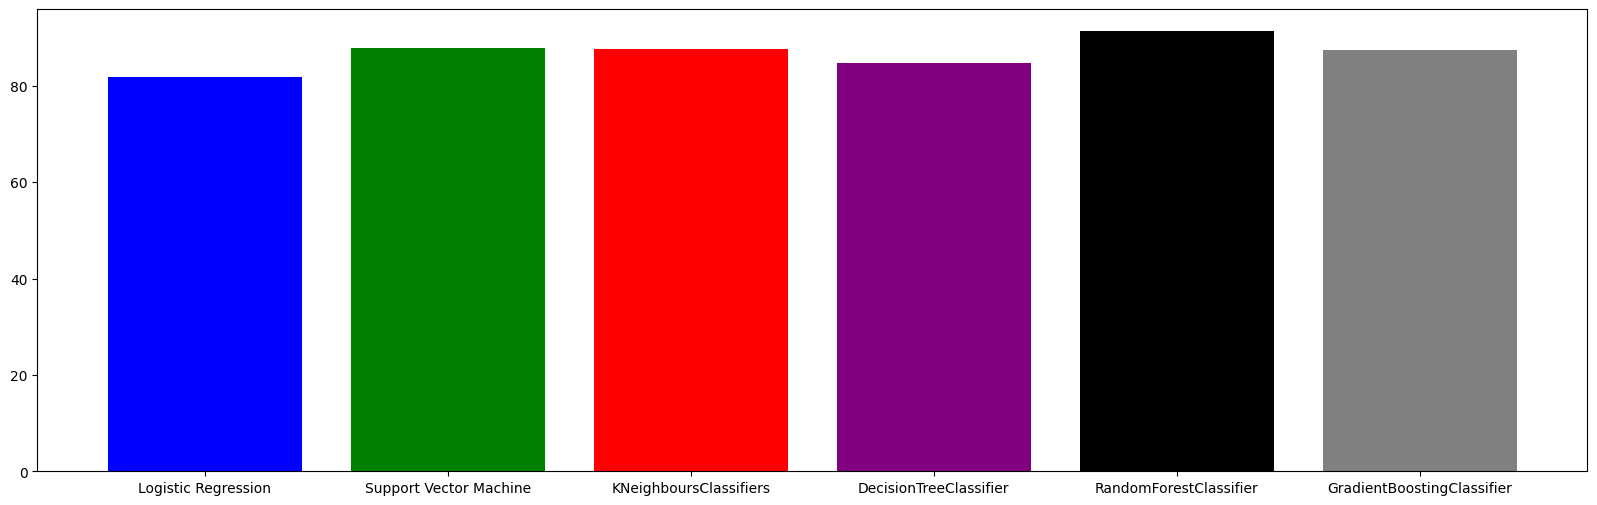

In [52]:
plt.figure(figsize=(20, 6))
colors = ['blue', 'green', 'red', "purple", "black", "grey"]
plt.bar(final_df["Models"], final_df["Accuracy"], color=colors)
plt.show()

## **Save the model**

In [53]:
import joblib

In [54]:
joblib.dump(rfc, "wine_quality_prediction")

['wine_quality_prediction']

In [55]:
model = joblib.load("wine_quality_prediction")

## **Test Prediction on A sample Data**

In [56]:
test_data = pd.DataFrame({

    "fixed acidity": 7.4,
    "volatile acidity": 0.70,
    "citric acid": 0.00,
    "residual sugar": 1.9,
    "chlorides": 0.076,
    "free sulfur dioxide": 11.0,
    "total sulfur dioxide": 34.0,
    "density": 0.9978,
    "pH": 3.51,
    "sulphates": 0.56,
    "alcohol": 9.4
}, index=[0])

In [57]:
test_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [58]:
test = pca.transform(sc.transform(test_data))

prediction = model.predict(test)

if prediction[0] == 1:
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")

Bad Quality Wine


## **Graphical User Interface**

In [69]:
from tkinter import *
from tkinter.ttk import *
import tkinter as tk
from sklearn.preprocessing import StandardScaler
import joblib

In [76]:
def show_entry_fields():
    try:
        p1 = float(e1.get())
        p2 = float(e2.get())
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        p6 = float(e6.get())
        p7 = float(e7.get())
        p8 = float(e8.get())
        p9 = float(e9.get())
        p10 = float(e10.get())
        p11 = float(e11.get())
        model = joblib.load("wine_quality_prediction")
        result = model.predict(pca.transform(sc.transform([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11]])))

        if result[0] == 0:
            Label(master, text="Bad Quality Wine").grid(row=31)
        else:
            Label(master, text="Good Quality Wine").grid(row=31)
    except TclError:
        print("TclError: No display name and no $DISPLAY environment variable. GUI cannot be created.")


master = Tk()


master.title("Wine Quality Prediction Using Machine Learning")

label = Label(master, text="Wine Quality Production Using Machine Learning",
                            bg="Black", fg="White")
label.grid(row=0, columnspan=2)

Label(master, text="fixed acidity").grid(row=1)
Label(master, text="volatile acidity").grid(row=2)
Label(master, text="citric acid").grid(row=3)
Label(master, text="residual sugar").grid(row=4)
Label(master, text="chlorides").grid(row=5)
Label(master, text="free sulfur dioxide").grid(row=6)
Label(master, text="total sulfur dioxide").grid(row=7)
Label(master, text="density").grid(row=8)
Label(master, text="pH").grid(row=9)
Label(master, text="sulphates").grid(row=10)
Label(master, text="alcohol").grid(row=11)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)

Button(master, text="Predict", command=show_entry_fields).grid()

mainloop()


TclError: no display name and no $DISPLAY environment variable